<a href="https://colab.research.google.com/github/EmanTahaNasr/AI_projects/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DatumLearning/SSD_using_OpenCV

Cloning into 'SSD_using_OpenCV'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 21.19 MiB | 9.69 MiB/s, done.


In [ ]:
!pip install numpy
!pip install opencv-python


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

proto = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
weights = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(proto , weights)

img = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
img_resized = cv2.resize(img , (300 , 300))

gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY) #gray to bgr
#Filters#
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
edges_img = cv2.Canny(blur_img, 100, 200)

blob = cv2.dnn.blobFromImage(img_resized , 0.007843 , (300 , 300) ,
                             (127.5 , 127.5 , 127.5) , False)
net.setInput(blob)
detections = net.forward()

height , width , _ = img.shape

final = detections.squeeze()

ig = img_resized.copy()
new_h, new_w = img_resized.shape[:2]

font = cv2.FONT_HERSHEY_SIMPLEX
#make square around any object
for i in range(final.shape[0]):
  conf = final[i , 2]
  if conf > 0.5:
    class_name = classNames[final[i , 1]]
    x1 , y1 , x2 , y2 = final[i , 3:]
    x1 *= new_w
    y1 *= new_h
    x2 *= new_w
    y2 *= new_h
    top_left = (int(x1) , int(y1))
    bottom_right = (int(x2) , int(y2))
    ig = cv2.rectangle(ig , top_left , bottom_right , (0 , 255 , 0) , 3)
    ig = cv2.putText(ig , class_name , (int(x1) , int(y1) - 10) , font ,
                     1 , (255 , 0 , 0) , 2 , cv2.LINE_AA)

ig = cv2.resize(ig, (width, height))

mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50, 50, img.shape[1]-50, img.shape[0]-50)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)




(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[ 2.00655644e-01,  1.67626792e-01,  2.28369325e-01,
          1.76610067e-01,  2.26738172e-01,  1.04597351e+02,
          1.73190380e+02,  1.64718059e+02,  4.82093321e+01,
          5.54730147e+01,  5.34735843e+01,  8.06645761e+01,
          1.40497718e+02,  1.19979130e+02,  1.71967652e+02,
          1.80529059e+02,  1.77667057e+02,  5.83748947e+01,
          1.04144231e+02,  8.65088083e+01,  4.48714153e+02,
          1.91683049e+02,  1.09523363e+02,  1.91683049e+02,
          6.63208858e+02,  1.61830740e+02,  1.09523363e+02,
          1.61830740e+02,  2.01470434e+02,  5.58282377e+02,
          4.87004557e+02,  5.30090639e+02,  4.87004557e+02,
          5.81574567e+02,  5.58514868e+02,  5.30090639e+02,
          5.58514868e+02,  5.67300994e+02,  3.53399250

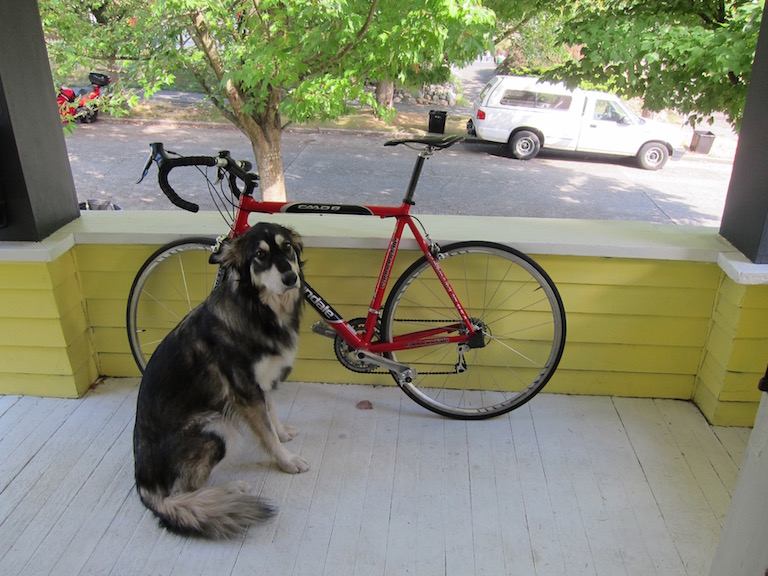

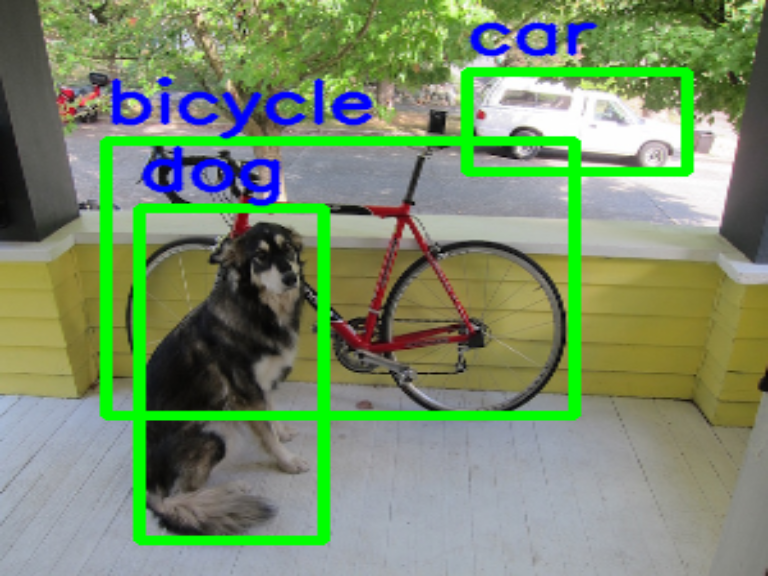

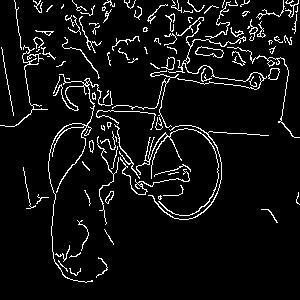

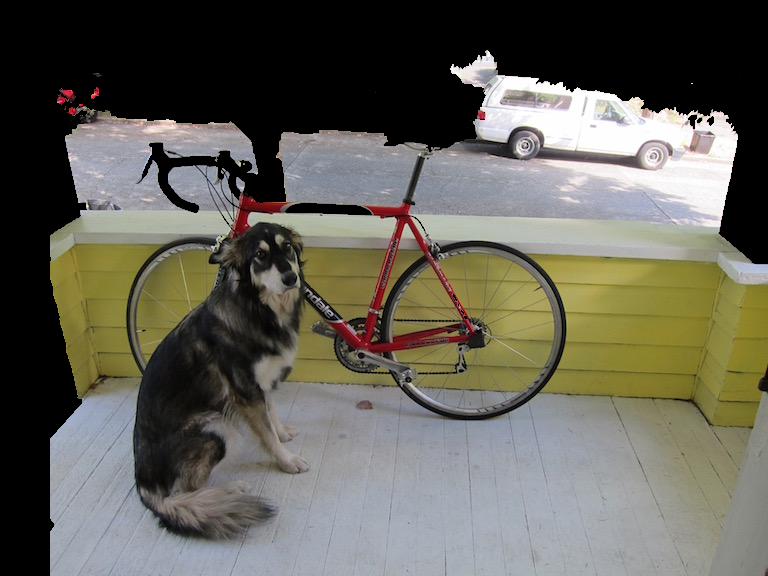

'\ncv2_imshow(img): This displays the original input image. It shows the image exactly as it was loaded from the file.\n\ncv2_imshow(ig): This shows the object detection results. It displays the resized image (img_resized) with bounding boxes and labels drawn around the detected objects. Each object is identified with its corresponding class label.\n\ncv2_imshow(edges_img): This displays the edges detected using the Canny edge detection filter. The Canny filter enhances the edges in the grayscale image, resulting in a binary image where edges are represented as white lines on a black background.\n\ncv2_imshow(img_grabcut): This shows the image after applying the GrabCut algorithm for segmentation. It displays the segmented image where the foreground (object) is preserved, and the background is set to zero intensity. The result is a clear separation between the object and the background.\n\nBy displaying these images, you can visually inspect and analyze the different stages of the obje

In [ ]:
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img_grabcut = img * mask2[:, :, np.newaxis]

cv2_imshow(img)
cv2_imshow(ig)
cv2_imshow(edges_img)
cv2_imshow(img_grabcut)
"""
cv2_imshow(img): This displays the original input image. It shows the image exactly as it was loaded from the file.

cv2_imshow(ig): This shows the object detection results. It displays the resized image (img_resized) with bounding boxes and labels drawn around the detected objects. Each object is identified with its corresponding class label.

cv2_imshow(edges_img): This displays the edges detected using the Canny edge detection filter. The Canny filter enhances the edges in the grayscale image, resulting in a binary image where edges are represented as white lines on a black background.

cv2_imshow(img_grabcut): This shows the image after applying the GrabCut algorithm for segmentation. It displays the segmented image where the foreground (object) is preserved, and the background is set to zero intensity. The result is a clear separation between the object and the background.

By displaying these images, you can visually inspect and analyze the different stages of the object detection process, including the input image, the detected objects with bounding boxes, the edges detected by the Canny filter, and the segmentation result obtained through GrabCut.
"""